In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Ahmed\Documents\project\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
shape = df.shape
missing = df.isnull().sum().sum() # total count of missing NaN values in the whole dataset.
duplicate = df.duplicated().sum().sum()

print("Rows:", shape[0])
print("Columns:", shape[1])
print("Missing values:", missing)
print("Duplicate values:",duplicate)

Rows: 1470
Columns: 35
Missing values: 0
Duplicate values: 0


In [4]:
df.columns.tolist()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [5]:
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1070,28,No,Travel_Frequently,467,Sales,7,3,Life Sciences,1,1507,...,4,80,0,5,5,3,4,2,1,3
524,34,No,Travel_Rarely,1442,Research & Development,9,3,Medical,1,717,...,2,80,0,9,3,4,8,7,7,7
687,36,No,Travel_Rarely,938,Research & Development,2,4,Medical,1,958,...,3,80,0,16,6,3,11,8,3,9
281,42,No,Travel_Rarely,635,Sales,1,1,Life Sciences,1,387,...,3,80,0,20,3,3,20,16,11,6
1356,41,No,Travel_Rarely,337,Sales,8,3,Marketing,1,1909,...,3,80,1,14,3,3,5,4,1,4


In [7]:
# Summary statistics for numeric variables
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [36]:
# Select only categorical (object) columns
cat_col = df.select_dtypes(include=['object'] ).columns

# Summary statistics of categorical variables
df[cat_col].describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [6]:
# raw counts
att_counts = df['Attrition'].value_counts()
# النسبة
att_props = df['Attrition'].value_counts(normalize=True)
print(att_counts)
print(att_props)

Attrition
No     1233
Yes     237
Name: count, dtype: int64
Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64


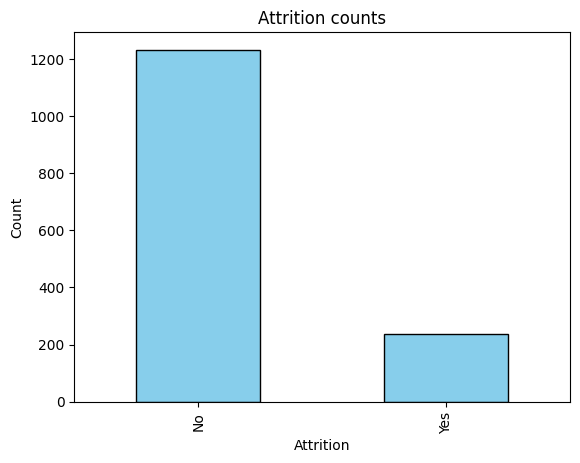

In [9]:
att_counts.plot(kind='bar',color='skyblue', edgecolor='black')
plt.title("Attrition Y/N")
plt.ylabel("Count")
plt.show()

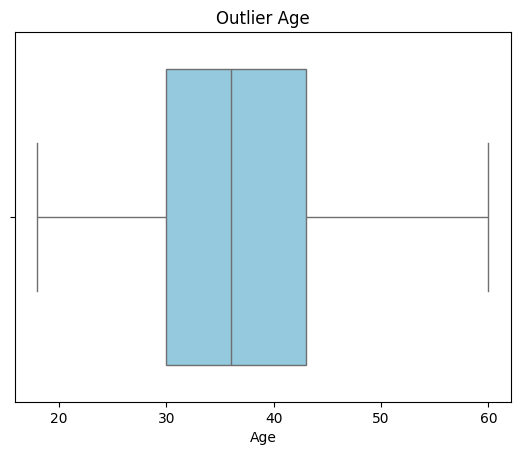

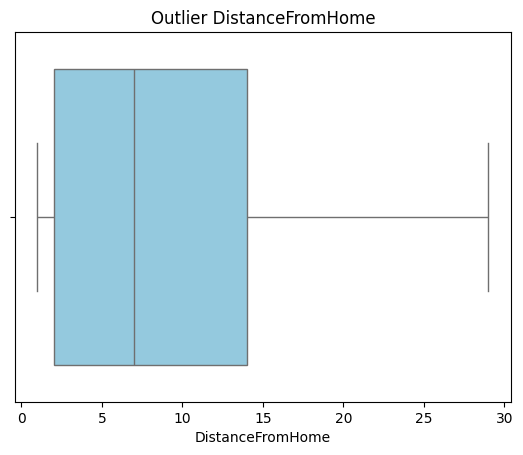

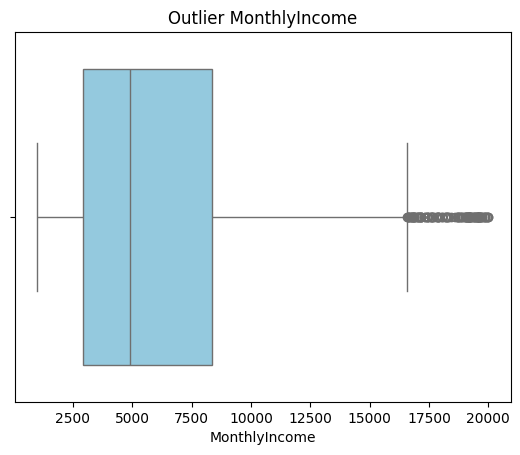

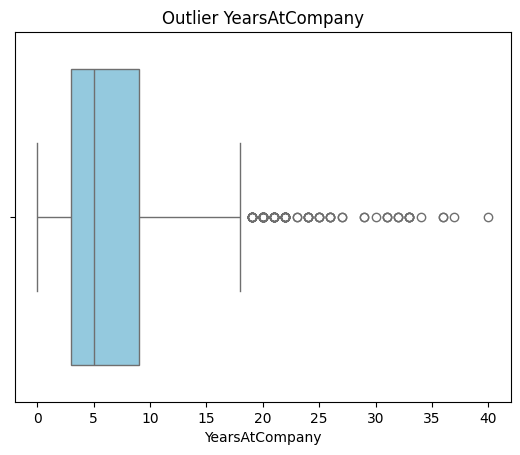

In [10]:
# Boxplot for some numeric columns
for col in ['Age','DistanceFromHome','MonthlyIncome','YearsAtCompany']:
    sns.boxplot(x=df[col],  color="skyblue")
    plt.title(f"Outlier {col}")
    plt.show()

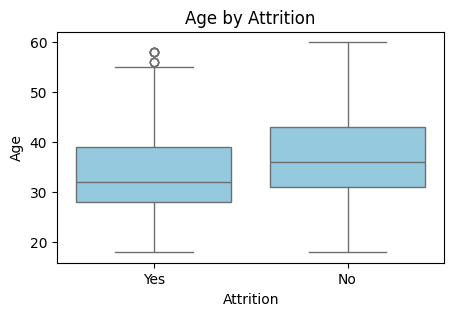

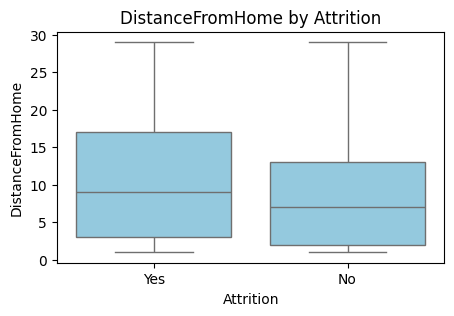

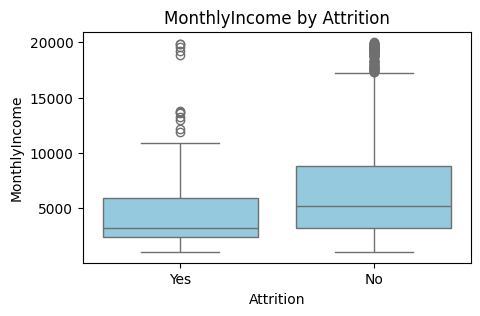

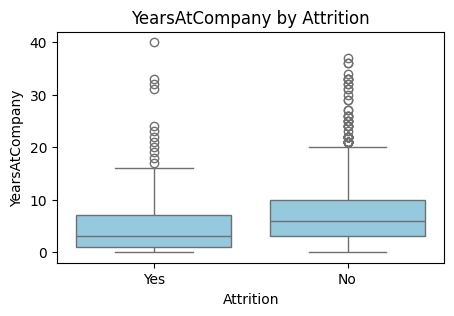

In [11]:
for col in ['Age','DistanceFromHome','MonthlyIncome','YearsAtCompany']:
    plt.figure(figsize=(5,3))
    sns.boxplot(data = df, x = 'Attrition', y = col, color = 'skyblue' )
    plt.title(f"{col} by Attrition")
    plt.show()

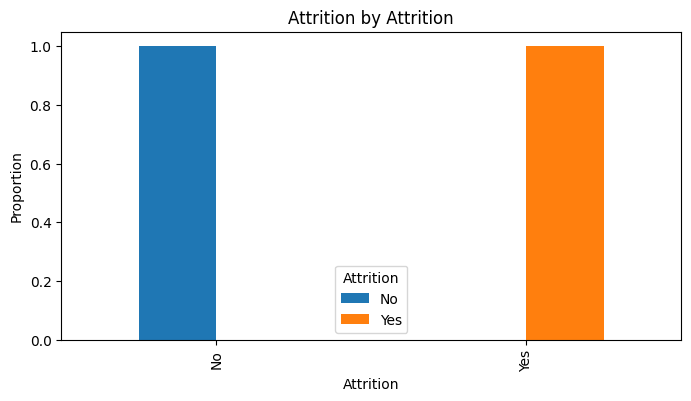

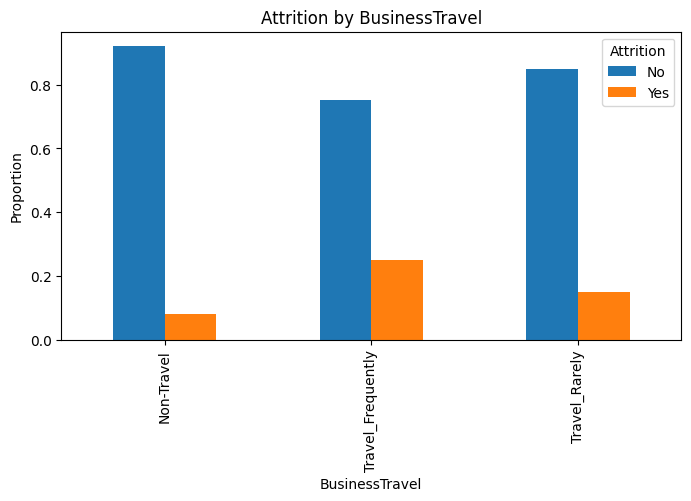

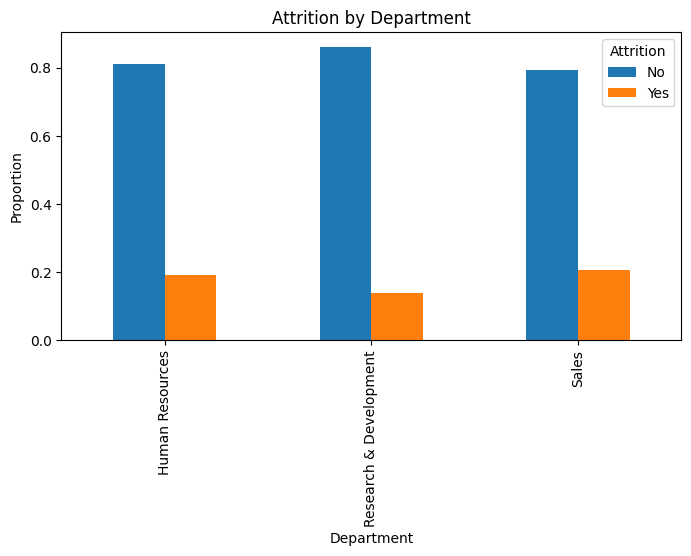

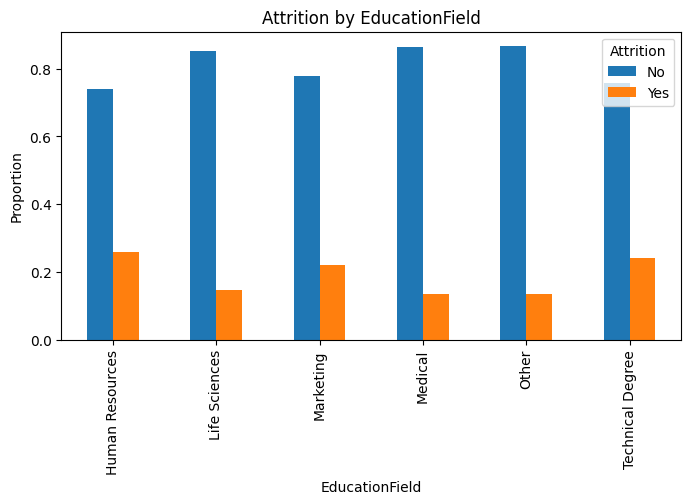

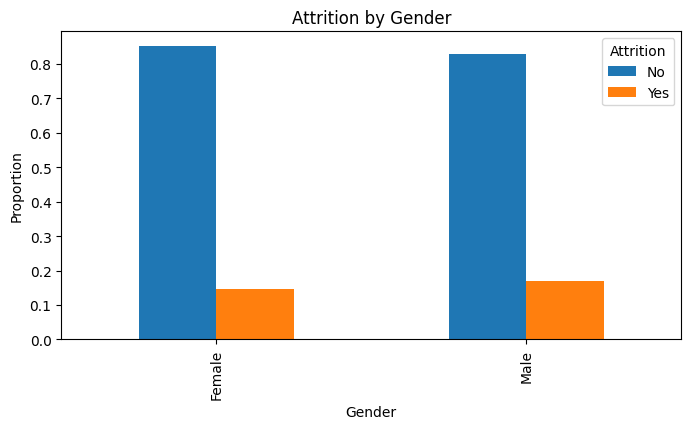

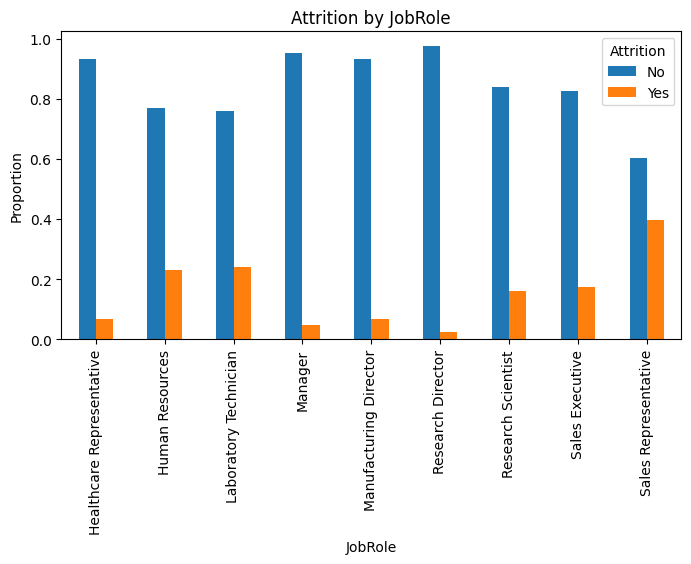

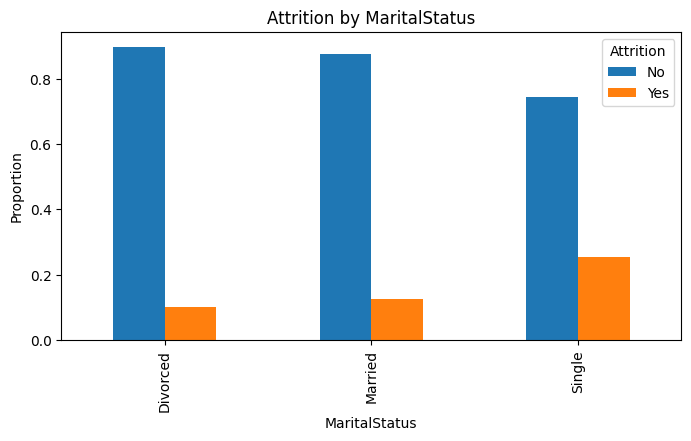

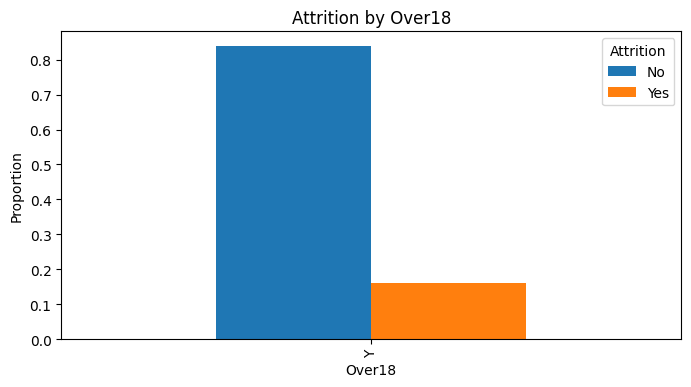

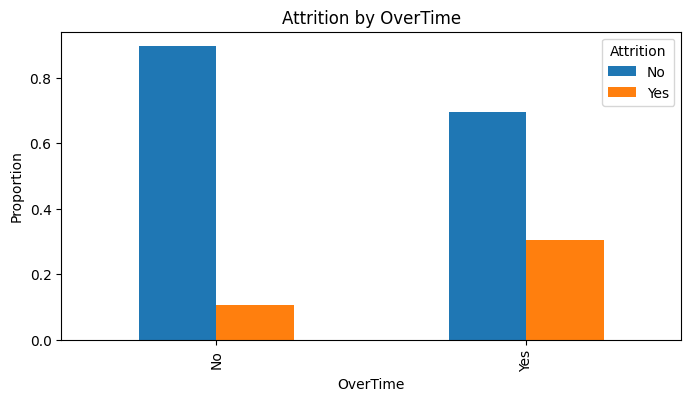

In [15]:
for col in cat_col:
    prop = pd.crosstab(df[col], df['Attrition'], normalize='index')
    prop.plot(kind='bar', figsize=(8,4))
    plt.title(f"Attrition by {col}")
    plt.ylabel("Proportion")
    plt.show()

In [17]:
# Simple value counts for all categorical variables
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col}:")
    print(df[col].value_counts())


Attrition:
Attrition
No     1233
Yes     237
Name: count, dtype: int64

BusinessTravel:
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

Department:
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

EducationField:
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

Gender:
Gender
Male      882
Female    588
Name: count, dtype: int64

JobRole:
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

MaritalStatus:
MaritalStatus
Married  

In [33]:
# Select categorical columns
cat_cols = df.select_dtypes(include='object').columns

# Loop through each categorical column
for col in cat_cols:
    print(f"\nColumn: {col}")
    
    # Get value counts and reset index
    vc_df = df[col].value_counts().reset_index()
    
    # Rename the columns: first column as the column name, second as 'count'
    vc_df.columns = [col, 'count']
    
    # Display the result
    display(vc_df)


Column: Attrition


,Attrition,count
0,No,1233
1,Yes,237



Column: BusinessTravel


,BusinessTravel,count
0,Travel_Rarely,1043
1,Travel_Frequently,277
2,Non-Travel,150



Column: Department


,Department,count
0,Research & Development,961
1,Sales,446
2,Human Resources,63



Column: EducationField


,EducationField,count
0,Life Sciences,606
1,Medical,464
2,Marketing,159
3,Technical Degree,132
4,Other,82
5,Human Resources,27



Column: Gender


,Gender,count
0,Male,882
1,Female,588



Column: JobRole


,JobRole,count
0,Sales Executive,326
1,Research Scientist,292
2,Laboratory Technician,259
3,Manufacturing Director,145
4,Healthcare Representative,131
5,Manager,102
6,Sales Representative,83
7,Research Director,80
8,Human Resources,52



Column: MaritalStatus


,MaritalStatus,count
0,Married,673
1,Single,470
2,Divorced,327



Column: Over18


,Over18,count
0,Y,1470



Column: OverTime


,OverTime,count
0,No,1054
1,Yes,416


In [34]:
dept_attr = pd.crosstab(df['Department'], df['Attrition'], normalize='index')

print(dept_attr)   # table of proportions

Attrition                     No       Yes
Department                                
Human Resources         0.809524  0.190476
Research & Development  0.861602  0.138398
Sales                   0.793722  0.206278


In [35]:
# Select categorical columns
cat_cols = df.select_dtypes(include='object').columns

# Loop through each categorical column
for col in cat_cols:
    print(f"\nColumn: {col}")
    
    # Create a cross-tab of the column vs Attrition
    ct = pd.crosstab(df[col], df['Attrition']).reset_index()
    
    # Optionally, rename columns: first column as column name, keep attrition labels
    ct.columns.name = None  # remove crosstab index name
    display(ct)



Column: Attrition


,Attrition,No,Yes
0,No,1233,0
1,Yes,0,237



Column: BusinessTravel


,BusinessTravel,No,Yes
0,Non-Travel,138,12
1,Travel_Frequently,208,69
2,Travel_Rarely,887,156



Column: Department


,Department,No,Yes
0,Human Resources,51,12
1,Research & Development,828,133
2,Sales,354,92



Column: EducationField


,EducationField,No,Yes
0,Human Resources,20,7
1,Life Sciences,517,89
2,Marketing,124,35
3,Medical,401,63
4,Other,71,11
5,Technical Degree,100,32



Column: Gender


,Gender,No,Yes
0,Female,501,87
1,Male,732,150



Column: JobRole


,JobRole,No,Yes
0,Healthcare Representative,122,9
1,Human Resources,40,12
2,Laboratory Technician,197,62
3,Manager,97,5
4,Manufacturing Director,135,10
5,Research Director,78,2
6,Research Scientist,245,47
7,Sales Executive,269,57
8,Sales Representative,50,33



Column: MaritalStatus


,MaritalStatus,No,Yes
0,Divorced,294,33
1,Married,589,84
2,Single,350,120



Column: Over18


,Over18,No,Yes
0,Y,1233,237



Column: OverTime


,OverTime,No,Yes
0,No,944,110
1,Yes,289,127
